# 3. Streaming application using Spark Structured Streaming (60%)


<p>In this task, we will implement Spark Structured Streaming to consume the data from task 1
and perform predictive analytics.<p>
<strong>Important :
- In this task, use Spark Structured Streaming together with Spark SQL and ML
- You are also provided with a set of pre-trained pipeline models, one for
predicting attack in process data, another for predicting attack in memory data<strong>
<p>Write a python program that achieves the following requirements. Save the file as
Assignment-2B-Task3_streaming_application. ipynb .<p>

1. SparkSession is created using a SparkConf object, which would use two local cores
with a proper application name, and use UTC as the timezone 3 (4%)

In [1]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.0.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.0 pyspark-shell'
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, decode, expr

conf = SparkConf().setAppName("FIT5020-Assignment2B").setMaster("local[2]")
spark = SparkSession.builder.config(conf = conf).getOrCreate()

2. From the Kafka producers in Task 1.1 and 1.2, ingest the streaming data into Spark
Streaming for both process and memory activities(3%)

In [2]:
topic_memory = "ass_2b_memory"
df_memory = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "127.0.0.1:9092") \
    .option("subscribe", topic_memory) \
    .load()

In [3]:
topic_process = "ass_2B_process"
df_process = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "127.0.0.1:9092") \
    .option("subscribe", topic_process) \
    .load()

In [4]:
df_memory = df_memory.selectExpr("CAST(value AS STRING)")


In [5]:
df_process = df_process.selectExpr("CAST(value AS STRING)")

In [6]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
# # format the schema
# # {'sequence': 17, 'machine': 8, 'PID': 1439, 'MINFLT': 387, 'MAJFLT': 0, 'VSTEXT': 15, 'VSIZE': 9416.0, 'RSIZE': 472.0,
# #  'VGROW': 9416.0, 'RGROW': 472.0, 'MEM': 0.0, 'CMD': 'log', 'ts': 1603809685}

#{'sequence': 1, 'machine': 4, 'PID': 1442, 'TRUN': 0, 'TSLPI': 1, 'TSLPU': 0, 'POLI': 'norm', 'NICE': 0, 'PRI': 120, 
#'RTPR': 0, 'CPUNR': 0, 'Status': '-', 'EXC': 0, 'State': 'S', 'CPU': 0.0, 'CMD': 'Xorg', 'ts': 1603821766}
# # define the shcema
schema_memory = StructType([    
    StructField('sequence', IntegerType(), True), 
    StructField('machine', IntegerType(), True),
    StructField('PID', IntegerType(), True),     
    StructField('MINFLT', StringType(), True), 
    StructField('MAJFLT', StringType(), True),
    StructField('VSTEXT', StringType(), True),
    StructField('VSIZE', DoubleType(), True), 
    StructField('RSIZE', StringType(), True),
    StructField('VGROW', StringType(), True),
    StructField('RGROW', StringType(), True),
    StructField('MEM', DoubleType(), True), 
    StructField('CMD', StringType(), True),
    StructField('ts', TimestampType(), True)
])


schema_process = StructType([    
    StructField('sequence', IntegerType(), True), 
    StructField('machine', IntegerType(), True),
    StructField('PID', IntegerType(), True),     
    StructField('TRUN', IntegerType(), True), 
    StructField('TSLPI', IntegerType(), True),
    StructField('TSLPU', IntegerType(), True),
    StructField('POLI', StringType(), True), 
    StructField('NICE', IntegerType(), True),
    StructField('PRI', IntegerType(), True),
    StructField('RTPR', IntegerType(), True),
    StructField('CPUNR', IntegerType(), True),
    StructField('Status', StringType(), True), 
    StructField('EXC', IntegerType(), True),
    StructField('State', StringType(), True),
    StructField('CPU', DoubleType(), True), 
    StructField('CMD', StringType(), True),
    StructField('ts', TimestampType(), True)
])



In [7]:
df_memory = df_memory.withColumn("value",F.explode(F.from_json("value",ArrayType(schema_memory))))

In [8]:
df_process = df_process.withColumn("value",F.explode(F.from_json("value",ArrayType(schema_process))))

In [9]:
df_memory = df_memory.select(
                    F.col("value.sequence").alias("sequence"),
                    F.col("value.machine").alias("machine"),
                    F.col("value.PID").alias("PID"),
                    F.col("value.MINFLT").alias("MINFLT"),
                    F.col("value.MAJFLT").alias("MAJFLT"),
                    F.col("value.VSTEXT").alias("VSTEXT"),
                    F.col("value.RSIZE").alias("RSIZE"),
                    F.col("value.VSIZE").alias("VSIZE"),
                    F.col("value.VGROW").alias("VGROW"),
                    F.col("value.RGROW").alias("RGROW"),
                    F.col("value.MEM").alias("MEM"),
                    F.col("value.CMD").alias("CMD"),
                    F.col("value.ts").alias("ts")
                )

In [10]:
df_process = df_process.select(
                    F.col("value.sequence").alias("sequence"),
                    F.col("value.machine").alias("machine"),
                    F.col("value.PID").alias("PID"),
                    F.col("value.TRUN").alias("TRUN"),
                    F.col("value.TSLPI").alias("TSLPI"),
                    F.col("value.TSLPU").alias("TSLPU"),
                    F.col("value.POLI").alias("POLI"),
                    F.col("value.NICE").alias("NICE"),
                    F.col("value.PRI").alias("PRI"),
                    F.col("value.RTPR").alias("RTPR"),
                    F.col("value.CPUNR").alias("CPUNR"),
                    F.col("value.Status").alias("Status"),
                    F.col("value.EXC").alias("EXC"),
                    F.col("value.State").alias("State"),
                    F.col("value.CPU").alias("CPU"),
                    F.col("value.CMD").alias("CMD"),
                    F.col("value.ts").alias("ts")
                )

3. Then the streaming data format should be transformed into the proper formats
following the metadata file schema for both process and memory, similar to
assignment 2A 4 (3%)

- The numeric values with extra spaces or “K” / “M” / “G” should be properly
transformed into their correct values
- The NICE value should also be restored based on the PRI values using their
relationship 5
- Hint - There is a mapping between PRI (priority) and NICE, as long as
the process is not yet finished during the last interval. For example,
- PRI 100 maps to NICE -20
- PRI 101 maps toNICE -19
- …
- PRI 139 maps to NICE 19
- Hint - If the process is finished, PRI and NICE would both be 0.

In [11]:
# calculating the value of alpha
# for column in ["MINFLT","MAJFLT","VSTEXT","RSIZE","RGROW"]:
#     df_memory.select(column).filter(col(column).contains("M") | col(column).contains("K") | col(column).contains("G")).show()
    
def cal_alpha(row):
    if 'K' in row:
        row = str(float(row[:-1]) * 1000)
    elif 'M' in row:
        row = str(float(row[:-1]) * 1000000)
    elif 'G' in row:
        row = str(float(row[:-1]) * 1000000000)
    return row

cal_alpha = F.udf(cal_alpha,StringType())

for column in ["MINFLT","MAJFLT","VSTEXT","RSIZE","RGROW"]:
    df_memory = df_memory.withColumn(column,cal_alpha(df_memory[column]))
    df_memory = df_memory.withColumn(column, df_memory[column].cast(DoubleType()))

In [12]:
# #handling unformated data in VGROW
# from pyspark.sql.functions import *

# # removing spaces in column "VGROW"  and convert it's datatype first
# df_memory = df_memory.withColumn("VGROW", regexp_replace(df_memory["VGROW"], " ", ""))
# df_memory = df_memory.withColumn("VGROW", df_memory["VGROW"].cast(DoubleType()))
# df_memory.select("VGROW").filter(col("VGROW").contains(" ")).show()

def remove_space(row):
    if " " in row:
        row = row.replace(" ","")
    return row

remove_space = F.udf(remove_space,StringType())
df_memory = df_memory.withColumn("VGROW",cal_alpha(df_memory["VGROW"]))
df_memory = df_memory.withColumn("VGROW",remove_space(df_memory["VGROW"]))
df_memory = df_memory.withColumn("VGROW",df_memory["VGROW"].cast(DoubleType()))

In [13]:
# restore NICE
def cal_nice(pri,nice):
    if pri == 0 and nice == 0:
        return nice
    else:
        nice = pri - 120
        return nice

cal_nice = F.udf(cal_nice,IntegerType())
df_process = df_process.withColumn("NICE",cal_nice(F.col("PRI"),F.col("NICE")))

4. For process and memory, respectively, create a new column “CMD_PID”
concatenating “CMD” and “PID” columns, and a new column “event_time” as
timestamp format based on the unix time in “ts” column (5%)
 - Allow 20-second tolerance for possible data delay on “event_time” using
watermarking

Q: This event_time value is local time or the time in ts column?

In [14]:
df_memory = df_memory.withColumn("CMD_PID",F.concat(F.col("CMD"),F.col("PID")))

In [15]:
df_memory = df_memory.withColumn("event_time",F.col("ts").cast(TimestampType()))

In [16]:
df_process = df_process.withColumn("CMD_PID",F.concat(F.col("CMD"),F.col("PID")))
df_process = df_process.withColumn("event_time",F.col("ts").cast(TimestampType()))

5. Persist the transformed streaming data in parquet format for both process and
memory (5%)
 - The process data should be stored in “process.parquet” in the same folder of
your notebook, and the memory data should be stored in “memory.parquet” in
the same folder of your notebook

In [17]:
query_memory_sink = df_memory.writeStream.format("parquet")\
        .outputMode("append")\
        .option("path", "memory.parquet")\
        .option("checkpointLocation", "memory.parquet/checkpoint")\
        .start()

In [18]:
query_memory_sink.stop()

In [19]:
query_process_sink = df_process.writeStream.format("parquet")\
        .outputMode("append")\
        .option("path", "process.parquet")\
        .option("checkpointLocation", "process.parquet/checkpoint")\
        .start()

In [20]:
query_process_sink.stop()

6. Load the machine learning models given 6 , and use the models to predict whether
each process or memory streaming record is an attack event, respectively (5%)

In [17]:
from pyspark.ml import PipelineModel
memory_model = PipelineModel.load('models/memory_pipeline_model')
process_model = PipelineModel.load('models/process_pipeline_model')

In [18]:
df_memory_predict = memory_model.transform(df_memory)

In [19]:
df_process_predict = process_model.transform(df_process)

7. Using the prediction result, and monitor the data following the requirements below
(30%)

7.a 

QA: watermark add here? from the 3.4 requirement

In [20]:
from pyspark.sql.functions import *
q1_memory_count = df_memory_predict\
    .filter(col("prediction") == 1.0)\
    .withWatermark("event_time", "20 seconds") \
    .groupBy(window(df_memory_predict.event_time,"120 seconds"), "machine")\
    .agg(approx_count_distinct(col("CMD_PID")).alias("count"))\
    .select("machine","window.start","window.end","count")

In [25]:
query_q1_memory_count = q1_memory_count \
    .writeStream \
    .outputMode("complete")\
    .format("console") \
    .trigger(processingTime='10 seconds') \
    .start()

In [29]:
query_q1_memory_count.stop()

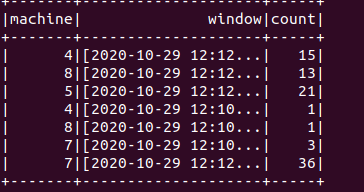

In [21]:
query_7a_memory = q1_memory_count \
    .writeStream \
    .outputMode("complete")\
    .format("memory") \
    .queryName("memory_7a")\
    .trigger(processingTime='10 seconds') \
    .start()

In [78]:
query_7a_memory.stop()

In [22]:
q1_process_count = df_process_predict\
    .filter(col("prediction") == 1.0)\
    .withWatermark("event_time", "20 seconds") \
    .groupBy(window(df_process_predict.event_time,"120 seconds"), "machine")\
    .agg(approx_count_distinct(col("CMD_PID")).alias("count"))\
    .select("machine","window.start","window.end","count")

In [26]:
query_7a_pro = q1_process_count \
    .writeStream \
    .outputMode("complete")\
    .format("memory") \
    .queryName("process_7a")\
    .trigger(processingTime='10 seconds') \
    .start()

In [84]:
query_7a_pro.stop()

In [28]:
query_q1_process_count = q1_process_count \
    .writeStream \
    .outputMode("complete")\
    .format("console") \
    .trigger(processingTime='10 seconds') \
    .start()

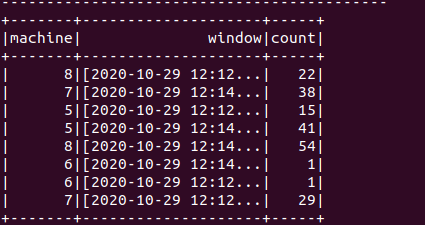

In [86]:
query_q1_memory_count.stop()

7.b

In [38]:
import datetime
from pyspark.sql.functions import *
df_process_temp = df_process_predict.filter(col("prediction") == 1.0)
df_memory_temp = df_memory_predict.filter(col("prediction") == 1.0)
df_joined = df_process_temp.join(df_memory_temp,df_process_temp.machine == df_memory_temp.machine,"inner").filter(df_process_temp.CMD_PID == df_memory_temp.CMD_PID).filter(((unix_timestamp(df_process_temp.event_time) - unix_timestamp(df_memory_temp.event_time)) > 30) | ((unix_timestamp(df_process_temp.event_time) - unix_timestamp(df_memory_temp.event_time)) < 30))



In [24]:
temp = df_joined.withColumn("processing_time", unix_timestamp().cast(TimestampType()))

In [31]:

final = temp.select('TRUN','TSLPI','TSLPU','POLI','NICE','PRI','RTPR','CPUNR','Status','EXC','State',df_process_temp['machine'],df_process_temp['PID'],'TRUN','TRUN','TSLPI','TSLPU','POLI','NICE','PRI','RTPR','CPUNR','Status','EXC','State','CPU',df_process_temp['CMD'],df_process_temp['event_time'])

In [32]:
query_q2_sink = final.writeStream.format("parquet")\
        .outputMode("append")\
        .option("path", "process_memory_attack.parquet")\
        .option("checkpointLocation", "process_memory_attack.parquet/checkpoint")\
        .start()

In [33]:
query_q2_sink.stop()

8. Visualise the data in line charts for step 7a (5%)

- For the count of suspect attacks for each machine in step 7a, use Spark SQL
to query the data from Spark Memory sink, and prepare a line chart plot for
showing the count of suspect attacks for each machine at each 2-min window
from the start to the most recent, and refresh the plot every 10 minutes
- Hint - x-axis can be used to represent the timeline, while y-axis can be
used to represent the count; each machine’s line data can be
represented in different color legends

In [40]:
print(spark.sql("select * from process_7a").show())

+-------+-------------------+-------------------+-----+
|machine|              start|                end|count|
+-------+-------------------+-------------------+-----+
|      8|2020-10-30 12:28:00|2020-10-30 12:30:00|   74|
|      8|2020-10-30 12:26:00|2020-10-30 12:28:00|   54|
|      7|2020-10-30 12:28:00|2020-10-30 12:30:00|   67|
|      8|2020-10-30 12:30:00|2020-10-30 12:32:00|   49|
|      6|2020-10-30 12:28:00|2020-10-30 12:30:00|    1|
|      5|2020-10-30 12:26:00|2020-10-30 12:28:00|   88|
|      7|2020-10-30 12:30:00|2020-10-30 12:32:00|   49|
|      5|2020-10-30 12:28:00|2020-10-30 12:30:00|  185|
|      7|2020-10-30 12:26:00|2020-10-30 12:28:00|   59|
|      5|2020-10-30 12:30:00|2020-10-30 12:32:00|  153|
|      6|2020-10-30 12:26:00|2020-10-30 12:28:00|    1|
|      6|2020-10-30 12:30:00|2020-10-30 12:32:00|    1|
+-------+-------------------+-------------------+-----+

None


In [41]:
import pandas as pd
df_to_plot_memory = spark.sql("select * from memory_7a").toPandas()

In [31]:
df_to_plot_memory.head(3)

,machine,start,end,count
0,8,2020-10-30 12:26:00,2020-10-30 12:28:00,8
1,7,2020-10-30 12:24:00,2020-10-30 12:26:00,10
2,5,2020-10-30 12:26:00,2020-10-30 12:28:00,19


In [42]:
df_to_plot_process = spark.sql("select * from process_7a").toPandas()

In [43]:
df_to_plot_process.head(4)

,machine,start,end,count
0,8,2020-10-30 12:28:00,2020-10-30 12:30:00,74
1,8,2020-10-30 12:26:00,2020-10-30 12:28:00,54
2,7,2020-10-30 12:28:00,2020-10-30 12:30:00,67
3,8,2020-10-30 12:30:00,2020-10-30 12:32:00,50


In [44]:
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        # ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        ax1 = fig.add_subplot(211)
        ax2 = fig.add_subplot(212)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        ax1.title.set_text('Creation Time Vs Value')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Value')
        ax2.title.set_text('Arrival Time Vs Value')
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1, ax2
    except Exception as ex:
        print(str(ex))

<ipython-input-44-8f48fd12b6a0>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # displaying the figure


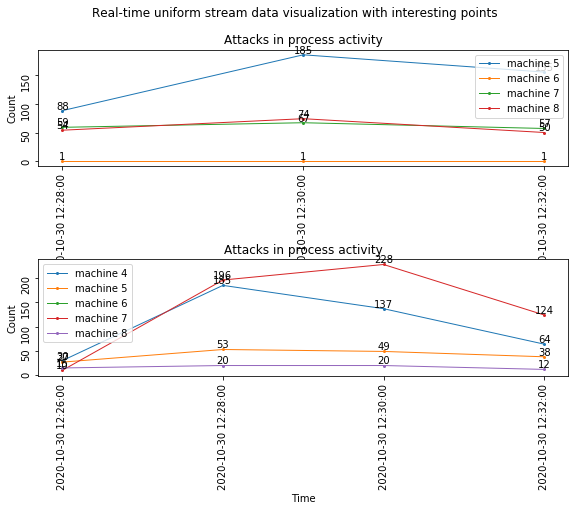

KeyboardInterrupt: 

In [49]:
fig,ax1,ax2= init_plots()

while 1:
    if len(df_to_plot_memory) > 0 or len(df_to_plot_process) > 0:
        for index_m in [4,5,6,7,8]:
            df_temp = df_to_plot_process[df_to_plot_process.machine == index_m]
            df_temp = df_temp.sort_values(by=['start'])
            start = df_temp['start'].to_list()
            end = df_temp['end'].to_list()
    #         x_process = [f'{i[0].strftime("%H:%M:%S")}-{i[1].strftime("%H:%M:%S")}' for i in time_window]
            x_process = []
            for i in range(0,len(start)):
#                 print(type(end[i] - start[i]))
                x_process.append(str(end[i]))
            y_count_process = df_temp['count'].to_list()
            if len(x_process) > 0:
                ax1.plot(x_process,
                    y_count_process,
                    linestyle='-',
                    linewidth=1,
                    label='machine ' + str(index_m),
                    marker='o',
                    markersize=2)
                for idx, label in enumerate(y_count_process):
                    ax1.text(idx, label, label, ha='center', va='bottom')
        ax1.set_title("Attacks in process activity")
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Count')
        ax1.tick_params(labelrotation=90)
        ax1.legend()
        
        for index_m in [4,5,6,7,8]:
            df_temp = df_to_plot_memory[df_to_plot_memory.machine == index_m]
            df_temp = df_temp.sort_values(by=['start'])
            start = df_temp['start'].to_list()
            end = df_temp['end'].to_list()
#             x_process = [f'{i[0].strftime("%H:%M:%S")}-{i[1].strftime("%H:%M:%S")}' for i in time_window]
            x_mem = []
            for i in range(0,len(start)):
#                 print(type(end[i] - start[i]))
                x_mem.append(str(end[i]))
            y_count_mem = df_temp['count'].to_list()
            if len(x_process) > 0:
                ax2.plot(x_mem,
                    y_count_mem,
                    linestyle='-',
                    linewidth=1,
                    label='machine ' + str(index_m),
                    marker='o',
                    markersize=2)
                for idx, label in enumerate(y_count_mem):
                    ax2.text(idx, label, label, ha='center', va='bottom')
        ax2.set_title("Attacks in process activity")
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Count')
        ax2.tick_params(labelrotation=90)
        ax2.legend()
        
        fig.canvas.draw()
        plt.show()
        
    else:
        print("No data for now")
    sleep(600)
    ax1.clear()
    ax2.clear()